In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_Hda = pd.read_csv("Heart Disease data.csv")

In [3]:
data_Hda

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data_Hda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data_Hda.shape

(1025, 14)

In [6]:
data_Hda.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
duplicates=data_Hda.duplicated().sum()

print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 723


In [8]:
# Remove duplicate rows
data_cleaned = data_Hda.drop_duplicates()



In [9]:
data_cleaned.shape

(302, 14)

In [15]:
data_cleaned['sex'] = data_cleaned['sex'].map({1: 'male', 0: 'female'})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13256\3005054044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex'] = data_cleaned['sex'].map({1: 'male', 0: 'female'})


In [17]:
data_cleaned['sex'].value_counts()

sex
male      206
female     96
Name: count, dtype: int64

In [19]:
data_cleaned['target'] =data_cleaned['target'].map({1: 'Present', 0: 'Absent'})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13256\645838816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['target'] =data_cleaned['target'].map({1: 'Present', 0: 'Absent'})


In [20]:
data_cleaned['target'].value_counts()

target
Present    164
Absent     138
Name: count, dtype: int64

In [21]:
data_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,Absent
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,Absent
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,Absent
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,Absent
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,female,2,120,211,0,0,115,0,1.5,1,0,2,Present
733,44,female,2,108,141,0,1,175,0,0.6,1,0,2,Present
739,52,male,0,128,255,0,1,161,1,0.0,2,1,3,Absent
843,59,male,3,160,273,0,0,125,0,0.0,2,0,2,Absent


In [10]:
# Save the cleaned dataset if needed
#data_cleaned.to_csv('Heart Disease cleaned data.csv', index=False)

In [11]:
# Summary Statistics
summary_statistics = data_cleaned.describe()

# Distribution of target variable
target_distribution = data_cleaned['target'].value_counts()

summary_statistics, target_distribution

(             age         sex          cp    trestbps        chol         fbs  \
 count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
 mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
 std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
 min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
 75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
 max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
 mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
 std      0.526027   22

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

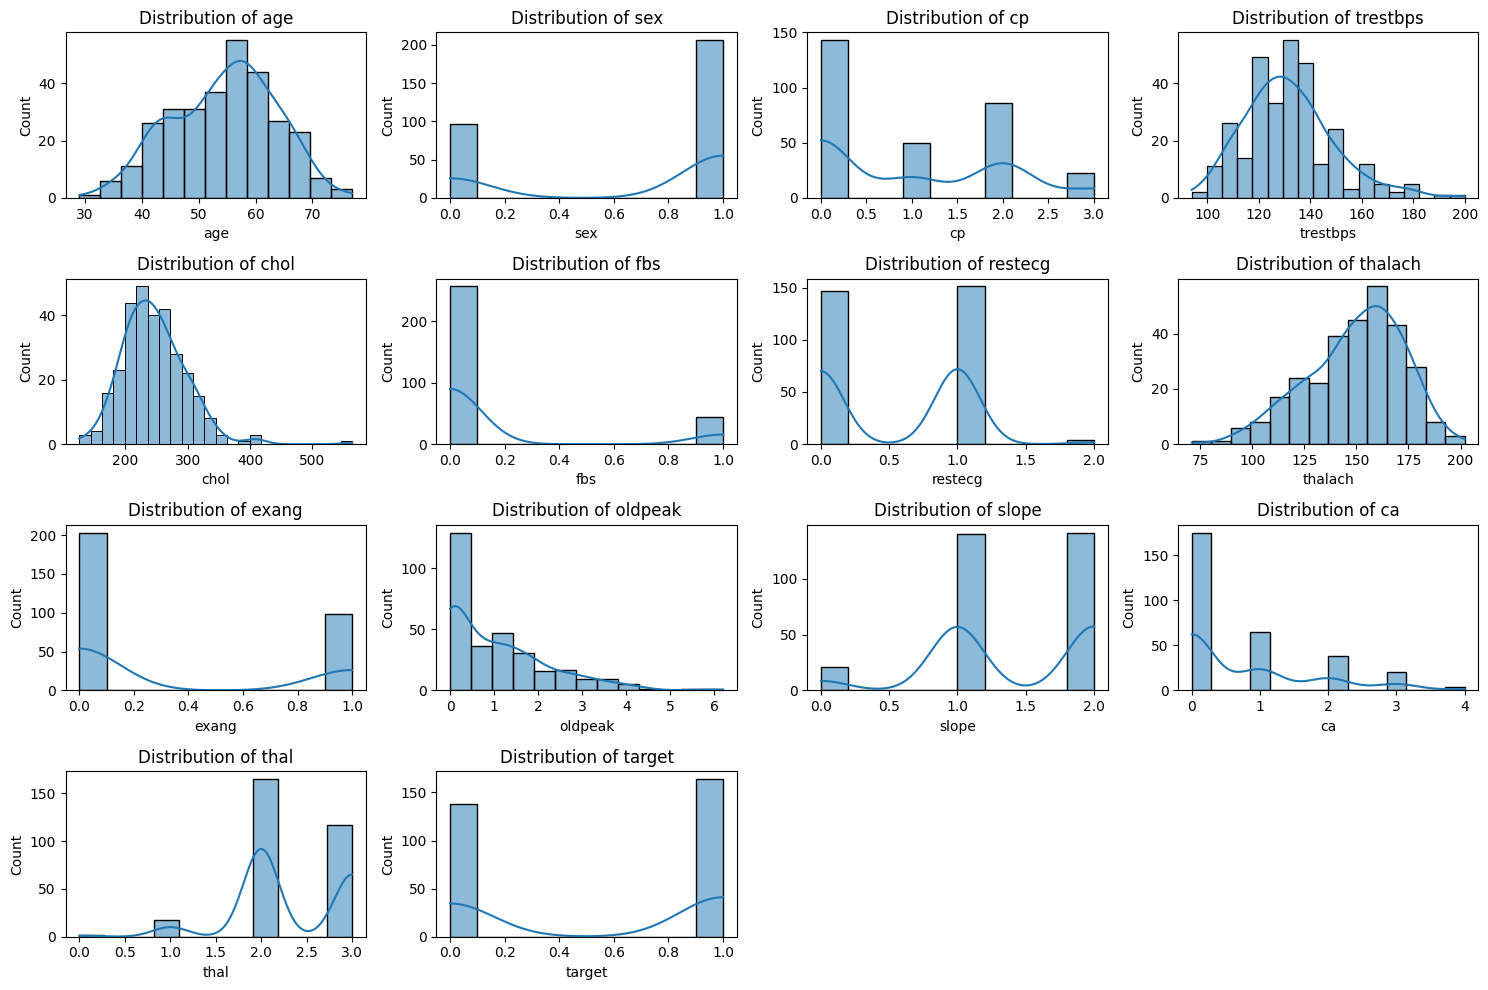

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot distribution for each feature
for i, column in enumerate(data_cleaned.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


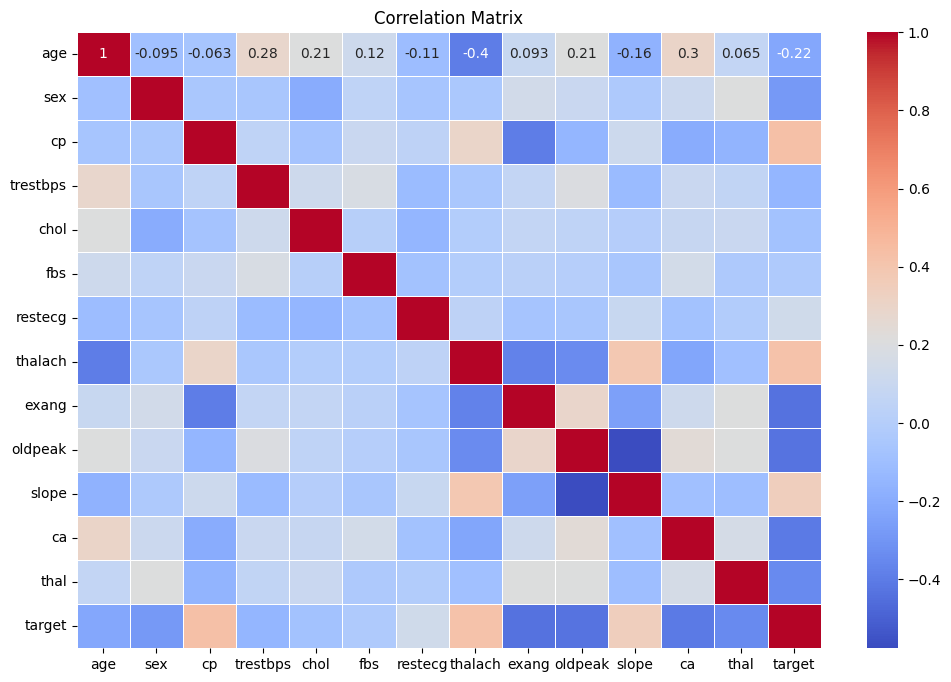

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Save the cleaned dataset if needed
data_cleaned.to_csv('Heart Disease cleaned data.csv', index=False)

In [14]:
# Save the cleaned dataset if needed
#data_cleaned.to_csv('Heart Disease cleaned data.csv', index=False)